# 画像処理　課題4

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

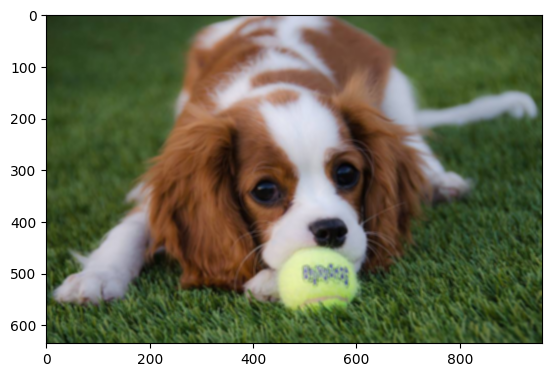

In [3]:
# 平滑化ぼかし処理し、それぞれ表示
img_path = "C:\\Users\\makot\\img\\dog.jpg"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_blur_5 = cv2.blur(img_rgb, (5,5))
plt.imshow(img_blur_5)

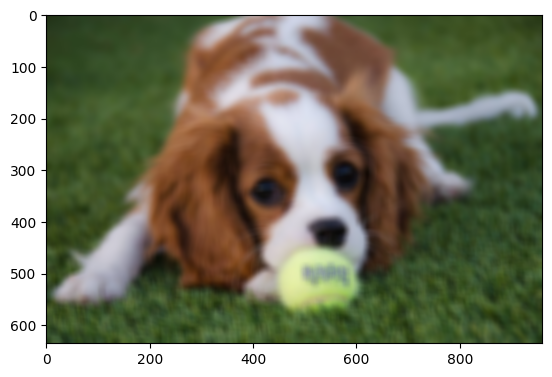

In [4]:
img_blur_15 = cv2.blur(img_rgb, (15,15))
plt.imshow(img_blur_15)

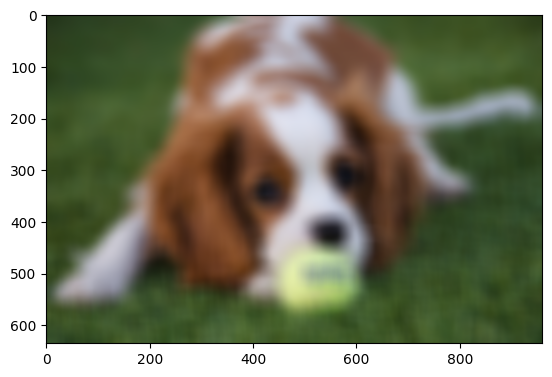

In [5]:
img_blur_35 = cv2.blur(img_rgb, (35,35))
plt.imshow(img_blur_35)

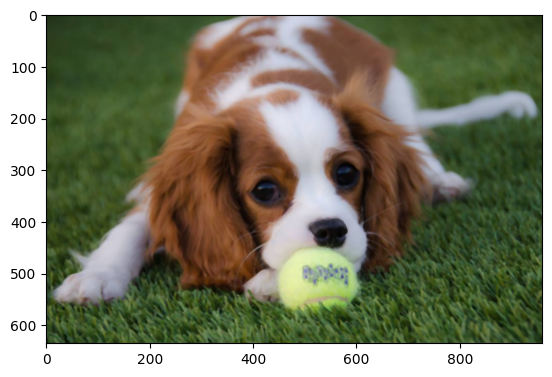

In [6]:
#2 cv2.madianBlurを用いて、ぼかし処理し、それぞれ表示
img_median_blur_5 = cv2.medianBlur(img_rgb, 5)
plt.imshow(img_median_blur_5)

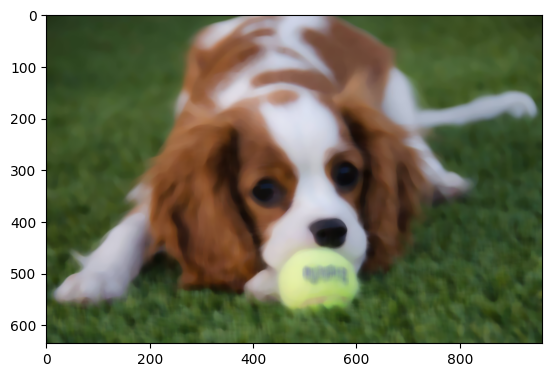

In [7]:
img_median_blur_15 = cv2.medianBlur(img_rgb, 15)
plt.imshow(img_median_blur_15)

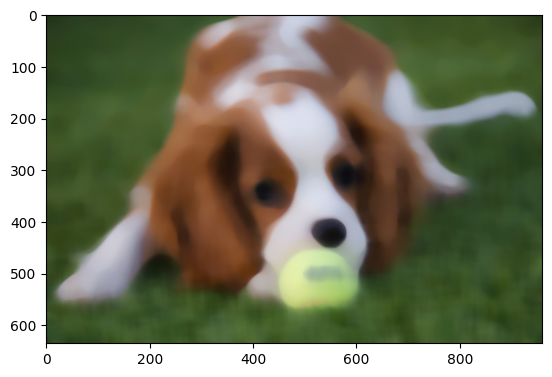

In [8]:
img_median_blur_35 = cv2.medianBlur(img_rgb, 35)
plt.imshow(img_median_blur_35)

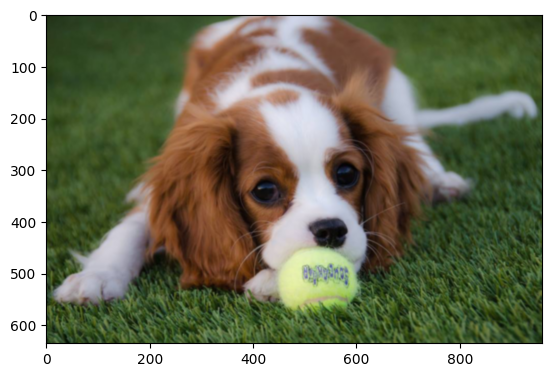

In [9]:
#3 GaussianBlurを用いて、ぼかし処理をし、それぞれ表示
img_gaussian_blur_5 = cv2.GaussianBlur(img_rgb, (5,5), 0)
plt.imshow(img_gaussian_blur_5)

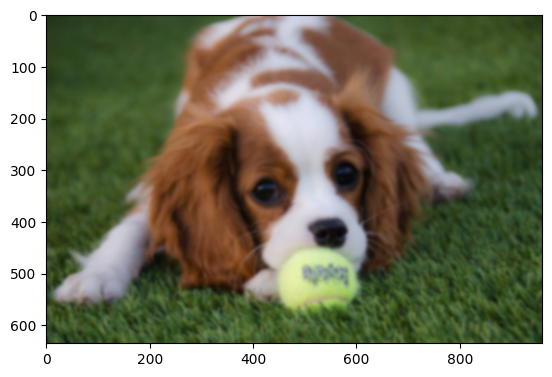

In [10]:
img_gaussian_blur_15 = cv2.GaussianBlur(img_rgb, (15,15), 0)
plt.imshow(img_gaussian_blur_15)

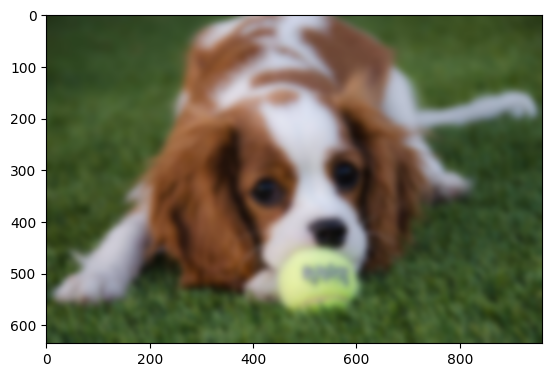

In [11]:
img_gaussian_blur_35 = cv2.GaussianBlur(img_rgb, (35,35), 0)
plt.imshow(img_gaussian_blur_35)

In [12]:
#4 kernel sizeを変化させ、それぞれ保存する
for i in range(3,35,2):
    img_blur = cv2.blur(img, (i,i))
    cv2.imwrite("C:\\Users\\makot\\test\\dog_blur\\dog_blur"+str(i)+".jpg", img_blur)

In [13]:
#5 指定して範囲を平滑化フィルタで平滑化処理を行う関数を作る
def My_Blur(img, x1, y1, x2, y2, fil_x, fil_y):
    h, w, c = img.shape
    if x1 < 0 or x2 < 0 or x1 > h or x2 > h or y1 < 0 or y2 < 0 or y1 > w or y2 > w:
        print("Out of range")
        return 
    if (x1 > x2 or y1 > y2):
        print("Wrong start and end")
        return 
    if (fil_x % 2 == 0 or fil_y % 2 == 0):
        print("Not odd number")
        return

    img_blur = cv2.blur(img[x1:x2, y1:y2], (fil_x, fil_y))
    img[x1:x2, y1:y2] = img_blur
    plt.imshow(img)
    return

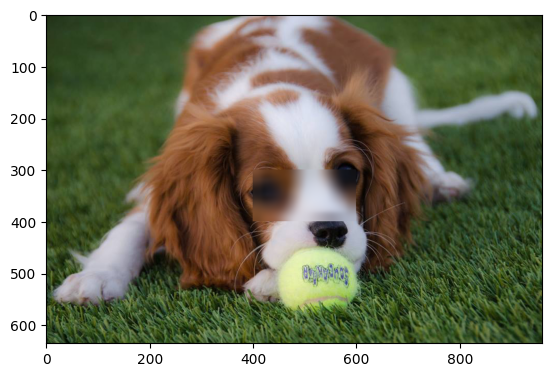

In [14]:
img_path = "C:\\Users\\makot\\img\\dog.jpg"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

My_Blur(img_rgb, 300, 400, 400, 600, 35, 35)

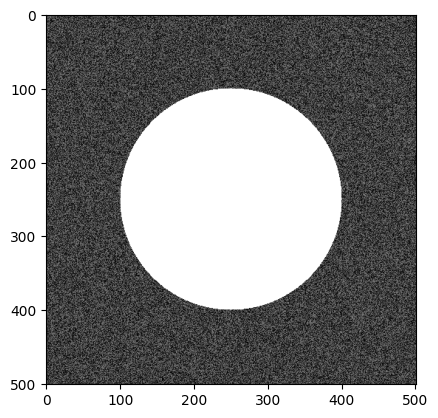

In [15]:
#6 Numpyで501×501のランダムに値を入れた画像を作成し、しきい値で二値化を行い、中心に円を描き、ノイズ除去を行う
img = np.random.randint(0,127,(501,501), np.uint8)
img_circle = cv2.circle(img, (250,250), 150, 255, -1)
plt.imshow(img, "gray")

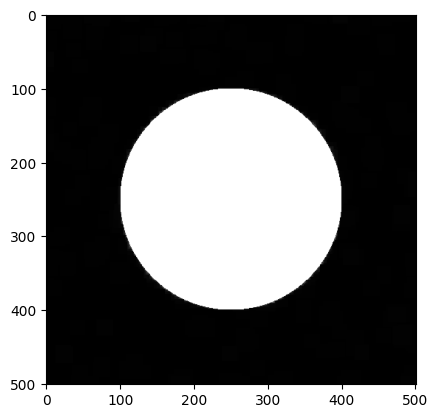

In [16]:
img_erode = cv2.erode(img_circle, np.ones((3,3), np.uint8), iterations=10)
img_dilate = cv2.dilate(img_erode, np.ones((3,3), np.uint8), iterations=10)
plt.imshow(img_dilate, "gray")

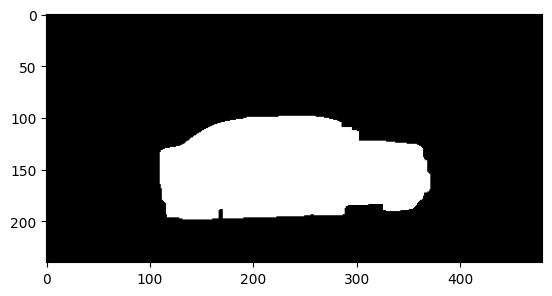

In [168]:
#7 Gray -> Blur -> Thresh -> Erode -> Dilateの順に処理を行い、車の検出
img = cv2.imread("C:\\Users\\makot\\img\\carinsnow.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray_blur = cv2.blur(img_gray, (5,5))
ret, img_thresh = cv2.threshold(img_gray_blur, 138, 255, cv2.THRESH_BINARY_INV)
plt.imshow(img_thresh)
img_erode = cv2.erode(img_thresh, np.ones((5,5), np.uint8), iterations = 1)
plt.imshow(img_erode, "gray")
img_dilate = cv2.dilate(img_erode, np.ones((13,13), np.uint8), iterations = 1)
plt.imshow(img_dilate, "gray")

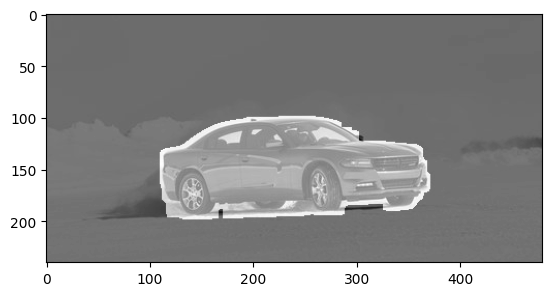

In [169]:
img_blend = cv2.addWeighted(img_dilate, 0.5, img_gray, 0.5, gamma=0)
plt.imshow(img_blend, "gray")

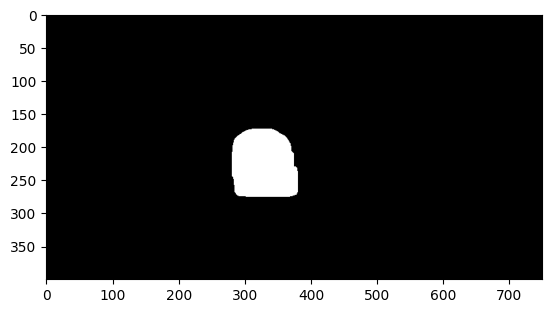

In [233]:
#8 carinsnow2から車の検出
img = cv2.imread("C:\\Users\\makot\\img\\carinsnow2.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray_blur = cv2.blur(img_gray, (51,51))
ret, img_thresh = cv2.threshold(img_gray_blur, 123, 255, cv2.THRESH_BINARY_INV)
img_erode = cv2.erode(img_thresh, np.ones((5,5), np.uint8), iterations = 1)
img_dilate = cv2.dilate(img_erode, np.ones((29,29), np.uint8), iterations = 1)
plt.imshow(img_dilate, "gray")

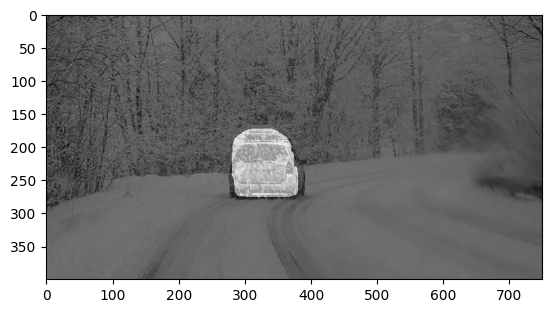

In [234]:
img_blend = cv2.addWeighted(img_dilate, 0.5, img_gray, 0.5, gamma=0)
plt.imshow(img_blend, "gray")